In [4]:
import numpy as np
import random
print(np.__version__)

2.0.0


# Simple Linear Regression

In [5]:
def square_method(base_price,price_per_room,price,learning_rate,num_of_rooms):

    prediction = base_price + num_of_rooms * price_per_room
    base_price += learning_rate * (price - prediction)
    price_per_room += learning_rate * num_of_rooms * (price - prediction)
    
    return base_price, price_per_room

In [6]:
def absolute_method(base_price,price_per_room,price,learning_rate,num_of_rooms):
    prediction = base_price + num_of_rooms * price_per_room

    if price > prediction :
        base_price += learning_rate 
        price_per_room += learning_rate * num_of_rooms
    else:
        base_price -= learning_rate
        price_per_room -= learning_rate * num_of_rooms
    
    return base_price , price_per_room

In [7]:
def simple_linear_regression(features,labels,learning_rate=0.01,epochs=1000):
    base_price = random.random()
    price_per_room = random.random()
    for epoch in range(epochs):
        i = random.randint(0,len(features)-1)
        num_of_rooms = features[i]
        price = labels[i]
        base_price , price_per_room = square_method(base_price,price_per_room,price,learning_rate,num_of_rooms)

    return base_price , price_per_room

In [8]:
features = np.array([1,2,3,5,6,7])
labels = np.array([155, 197, 244, 356, 407, 448])

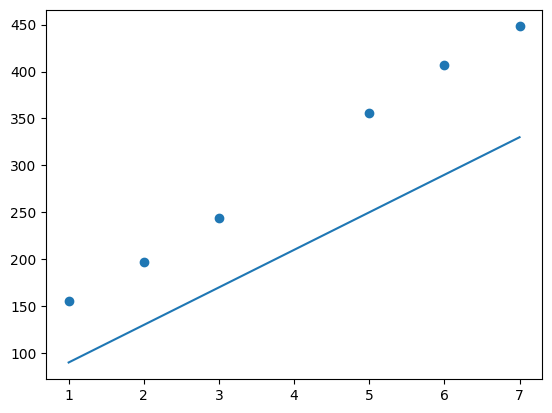

In [9]:
import matplotlib.pyplot as plt
plt.scatter(features,labels)
y = 40 * features + 50 # Random Weights and Bias
plt.plot(features,y)
plt.show()

In [10]:
base_price , price_per_room = simple_linear_regression(features,labels)
print(base_price,price_per_room)

88.89202738591332 52.206700054085694


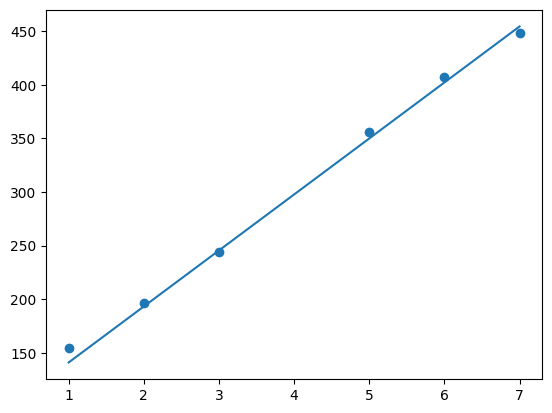

In [11]:
Y = price_per_room * features + base_price
plt.scatter(features,labels)
plt.plot(features,Y)
plt.show()

In [12]:
def predict_simple(user_rooms):
    predicted_price = price_per_room * user_rooms + base_price
    return predicted_price

In [13]:
user_rooms = 30
predicted_price = predict_simple(user_rooms)
print("The estimated price is: ",predicted_price)

The estimated price is:  1655.093029008484


In [14]:
def prediction_generator(test_data,model):
    test_predictions = []
    if model == "simple":
        for i in range(len(test_data)-1):
            test_predictions.append(predict_simple(test_data[i]))
    
    return test_predictions
    

In [15]:
def mse(predictions,labels):
    differences = []
    n = len(predictions)
    for i in range(n-1):
        differences.append(predictions[i]-labels[i])
    return 1.0/n * np.dot(differences,differences)

In [16]:
def mae(predictions,labels):
    differences = []
    n = len(predictions)-1
    for i in range(n-1):
        differences.append(abs(predictions[i]-labels[i]))
    
    return 1.0/n * sum(differences)

In [17]:
def rmse(predictions,labels):
    return np.sqrt(mse(predictions,labels))

In [18]:
predictions = prediction_generator(features,"simple")

In [19]:
mse(predictions,labels)

np.float64(49.2161977529412)

In [20]:
mae(predictions,labels)

np.float64(4.776993153521666)

In [21]:
rmse(predictions,labels)

np.float64(7.015425700051366)

In [22]:
def l1_norm(weights):
    l1 = 0
    for weight in weights:
        l1 += abs(weight)
    
    return l1

In [23]:
def l2_norm(weights):
    l2 = 0
    for weight in weights:
        l2 += weight**2
    
    return l2

In [25]:
l1_norm([price_per_room]),l2_norm([price_per_room])

(np.float64(52.206700054085694), np.float64(2725.5395305372713))